# integrazione di equazioni differenziali

In [1]:
%matplotlib inline
import pylab

/usr/local/lib/python3.4/dist-packages/matplotlib/__init__.py:1039: UserWarning: Bad val "348ABD, A60628, 7A68A6, 467821, CF4457, 188487, E24A33" on line #79
	"patch.facecolor        : 348ABD, A60628, 7A68A6, 467821, CF4457, 188487, E24A33
"
	in file "/home/PERSONALE/enrico.giampieri2/didattica/metodi_fisici/lezionipython/matplotlibrc"
	Key patch.facecolor: 348ABD, A60628, 7A68A6, 467821, CF4457, 188487, E24A33 does not look like a color arg
Color tuples must be length 3
  (val, error_details, msg))


In [2]:
from scipy.integrate import odeint

In [3]:
help(odeint)

Help on function odeint in module scipy.integrate.odepack:

odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, mxords=5, printmessg=0)
    Integrate a system of ordinary differential equations.
    
    Solve a system of ordinary differential equations using lsoda from the
    FORTRAN library odepack.
    
    Solves the initial value problem for stiff or non-stiff systems
    of first order ode-s::
    
        dy/dt = func(y,t0,...)
    
    where y can be a vector.
    
    Parameters
    ----------
    func : callable(y, t0, ...)
        Computes the derivative of y at t0.
    y0 : array
        Initial condition on y (can be a vector).
    t : array
        A sequence of time points for which to solve for y.  The initial
        value point should be the first element of this sequence.
    args : tuple, optional
        Extra arguments to pass to 

# $\dot y =  -y$
# $y(t=0) = y_0$

# $y(t) = y(0) e^{-t}$

## Genero la curva della mia equazione differenziale

In [4]:
y0 = 10.0

In [5]:
from pylab import linspace
time = linspace(0.0, 3.0, 15)

In [6]:
def derivata(yt, t):
    return -yt

In [7]:
yt = odeint(derivata, y0, time)

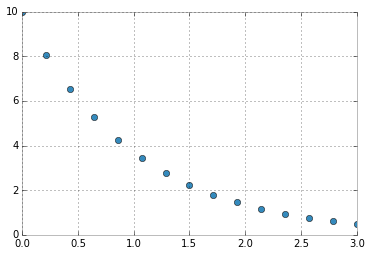

In [8]:
pylab.plot(time, yt, 'o')

In [9]:
yt

array([[ 10.        ],
       [  8.07117752],
       [  6.51439067],
       [  5.25788034],
       [  4.24372867],
       [  3.42518866],
       [  2.76453055],
       [  2.23130167],
       [  1.80092314],
       [  1.453557  ],
       [  1.17319163],
       [  0.94690377],
       [  0.76426282],
       [  0.61685008],
       [  0.49787063]])

##Genero dei dati con del rumore

In [10]:
y_obs = yt[:,0] + pylab.randn(15)

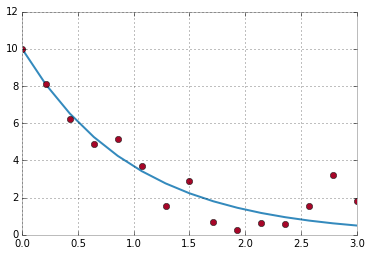

In [11]:
pylab.plot(time, yt)
pylab.plot(time, y_obs, 'o');

##Faccio il fit dei dati con la mia curva nota

In [12]:
from scipy.optimize import curve_fit

In [13]:
help(curve_fit)

Help on function curve_fit in module scipy.optimize.minpack:

curve_fit(f, xdata, ydata, p0=None, sigma=None, absolute_sigma=False, check_finite=True, **kw)
    Use non-linear least squares to fit a function, f, to data.
    
    Assumes ``ydata = f(xdata, *params) + eps``
    
    Parameters
    ----------
    f : callable
        The model function, f(x, ...).  It must take the independent
        variable as the first argument and the parameters to fit as
        separate remaining arguments.
    xdata : An M-length sequence or an (k,M)-shaped array
        for functions with k predictors.
        The independent variable where the data is measured.
    ydata : M-length sequence
        The dependent data --- nominally f(xdata, ...)
    p0 : None, scalar, or N-length sequence
        Initial guess for the parameters.  If None, then the initial
        values will all be 1 (if the number of parameters for the function
        can be determined using introspection, otherwise a ValueEr

In [14]:
y_obs

array([ 10.01324108,   8.12162334,   6.20190759,   4.85542373,
         5.14969555,   3.67821938,   1.55839307,   2.89051901,
         0.6763837 ,   0.23645013,   0.65387544,   0.56226443,
         1.53202658,   3.20865977,   1.83503806])

In [15]:
def decadimento(tempo, k):
    return pylab.exp(-k*tempo)*10.0

In [16]:
p, v = curve_fit(decadimento, time, y_obs, p0=[0.9])

In [17]:
p

array([ 1.01058971])

In [18]:
pylab.sqrt(v)

array([[ 0.10085394]])

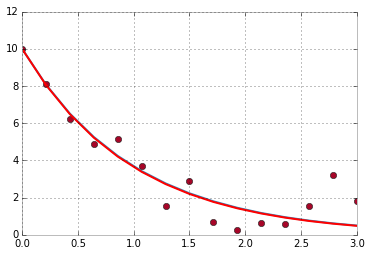

In [19]:
pylab.plot(time, yt)
pylab.plot(time, y_obs, 'o');

y_hat = decadimento(time, p)
pylab.plot(time, y_hat, '-r');

#Estensione ad un'equazione differenziale qualsiasi

In [20]:
def ydata_estimation(tempo, k):
    yt = odeint(decadimento, 10.0, tempo, args=(k,))
    return yt.ravel()

p, v = curve_fit(ydata_estimation, time, y_obs, p0=[0.9])

TypeError: decadimento() takes 2 positional arguments but 3 were given

In [21]:
p

array([ 1.05789127])

In [22]:
v

array([[ 0.0089071]])

In [23]:
s = pylab.sqrt(v)
s

array([[ 0.09437742]])

##stima della sensibilità dei miei dati

In [24]:
p_simulati = (pylab.randn(10)*s + p).ravel()

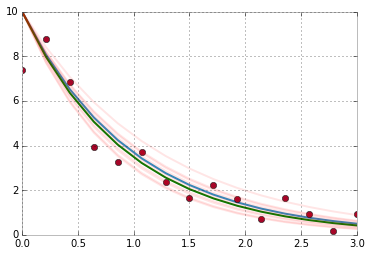

In [25]:
pylab.plot(time, yt)
pylab.plot(time, y_obs, 'o');

y_hat = ydata_estimation(time, p)
pylab.plot(time, y_hat, '-g');

for p_s in p_simulati:
    y_hat = ydata_estimation(time, p_s)
    pylab.plot(time, y_hat, '-r', alpha=0.1);

# fit dei dati osservati nel caso di curve multidimensionali

In [79]:
def oscillatore( s, t ):
    dx = -s[0]
    dv = +s[1]
    return ( dv, dx )

In [80]:
tempo = pylab.arange( 0.0, 5.0, 0.1 )

In [81]:
res = odeint( oscillatore, (0.0, 10.0), tempo )

In [82]:
x, v = res.T

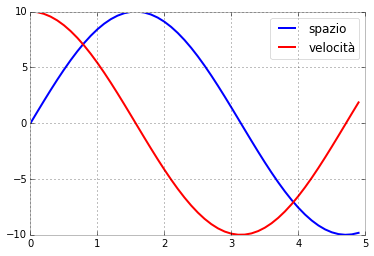

In [83]:
pylab.plot( tempo, x, label='spazio', color='b')
pylab.plot( tempo, v, label=u'velocità', color='r')
pylab.legend()

In [84]:
from scipy.optimize import curve_fit

In [124]:
obs = res + pylab.randn(*res.shape)*5
x_obs, v_obs = obs.T

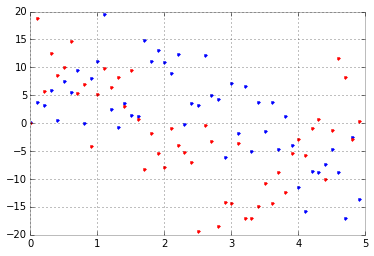

In [125]:
pylab.plot(tempo, x_obs, '.', label='spazio', color='b')
pylab.plot(tempo, v_obs, '.', label=u'velocità', color='r')

In [126]:
def evaluate_x(tempo, k1, k2):
    def oscillatore( s, t ):
        dx = k1*s[0]
        dv = k2*s[1]
        return ( dv, dx )
    res = odeint( oscillatore, (0.0, 10.0), tempo )
    return res.T.ravel()

In [127]:
parameters, covariance = curve_fit(evaluate_x, tempo, obs.T.ravel(), [0.1, 0.2])

In [128]:
parameters

array([-1.1279595 ,  0.88640607])

In [129]:
covariance

array([[ 0.01985118,  0.01340514],
       [ 0.01340514,  0.01126826]])

In [130]:
res_hat = evaluate_x(tempo, parameters[0], parameters[1]).reshape(2, -1)
x_hat, v_hat = res_hat

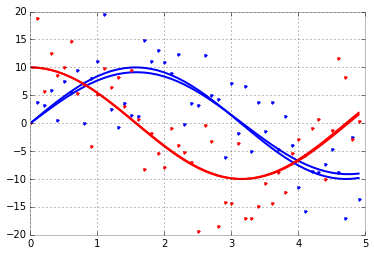

In [136]:
pylab.plot(tempo, x_obs, '.', color='b')
pylab.plot(tempo, x_hat, color='b')

pylab.plot(tempo, v_obs, '.', color='r')
pylab.plot(tempo, v_hat, color='r')

pylab.plot(tempo, x, label='spazio', color='b')
pylab.plot(tempo, v, label=u'velocità', color='r')

In [132]:
import numpy
from numpy.random import multivariate_normal

In [133]:
multivariate_normal(parameters, covariance, size=4)

array([[-1.12517992,  0.83460899],
       [-1.24362551,  0.73088957],
       [-0.96661198,  0.95053263],
       [-1.1917935 ,  0.82539899]])

In [134]:
p_simulati = multivariate_normal(parameters, covariance, size=20)

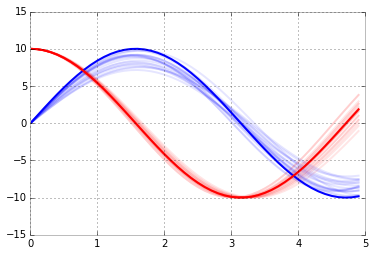

In [137]:
for (k1_s, k2_s) in p_simulati:
    x_hat, v_hat = evaluate_x(tempo, k1_s, k2_s).reshape(2, -1)
    pylab.plot(tempo, x_hat, '-b', alpha=0.1);
    pylab.plot(tempo, v_hat, '-r', alpha=0.1);
    
pylab.plot(tempo, x, label='spazio', color='b')
pylab.plot(tempo, v, label=u'velocità', color='r')